In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [2]:
dict_dayweek = {0: "Segunda",
                1: "Terça",
                2: "Quarta",
                3: "Quinta",
                4: "Sexta",
                5: "Sabado",
                6: "Domingo"}

In [3]:
df = pd.read_csv("../data/chargeback_data_final.csv")
df.replace({"dia_semana": dict_dayweek},inplace=True)
df_cbk = df.loc[(df['cbk'] == "Sim")]
df_nocbk = df.loc[(df['cbk'] == "Não")]
df

,dia,dia_semana,periodo_semana,periodo_mes,hora,hora_completa_segundos,periodo_dia,cartão,valor,media_dia,media_cartao,total_uso_cartao,cbk,vez_uso_cartao,cartao_usado_antes
0,1,Sexta,semana,inicio,0,114,madrugada,536518******2108,36.54,139.59,36.54,2,Não,1,False
1,1,Sexta,semana,inicio,0,226,madrugada,536518******2108,36.54,139.59,36.54,2,Não,2,True
2,1,Sexta,semana,inicio,0,530,madrugada,453211******1239,69.00,139.59,69.00,1,Não,1,False
3,1,Sexta,semana,inicio,0,1620,madrugada,548827******1705,193.43,139.59,193.43,1,Não,1,False
4,1,Sexta,semana,inicio,1,5566,madrugada,531681******9778,132.00,139.59,132.00,1,Não,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,30,Sabado,fds,fim,23,83327,noite,439354******5281,15.00,92.96,15.00,2,Não,1,False
11000,30,Sabado,fds,fim,23,83724,noite,549167******1648,20.00,92.96,20.00,2,Não,1,False
11001,30,Sabado,fds,fim,23,83861,noite,518759******8384,70.00,92.96,70.00,2,Não,1,False
11002,30,Sabado,fds,fim,23,85891,noite,518759******0329,20.00,92.96,20.00,2,Não,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dia                     11004 non-null  int64  
 1   dia_semana              11004 non-null  object 
 2   periodo_semana          11004 non-null  object 
 3   periodo_mes             11004 non-null  object 
 4   hora                    11004 non-null  int64  
 5   hora_completa_segundos  11004 non-null  int64  
 6   periodo_dia             11004 non-null  object 
 7   cartão                  11004 non-null  object 
 8   valor                   11004 non-null  float64
 9   media_dia               11004 non-null  float64
 10  media_cartao            11004 non-null  float64
 11  total_uso_cartao        11004 non-null  int64  
 12  cbk                     11004 non-null  object 
 13  vez_uso_cartao          11004 non-null  int64  
 14  cartao_usado_antes      11004 non-null

### Missing values

In [5]:
# Checando missing values
df.isna().sum()

dia                       0
dia_semana                0
periodo_semana            0
periodo_mes               0
hora                      0
hora_completa_segundos    0
periodo_dia               0
cartão                    0
valor                     0
media_dia                 0
media_cartao              0
total_uso_cartao          0
cbk                       0
vez_uso_cartao            0
cartao_usado_antes        0
dtype: int64

In [6]:
df['cbk'].value_counts()

cbk
Não    10437
Sim      567
Name: count, dtype: int64

### Geral

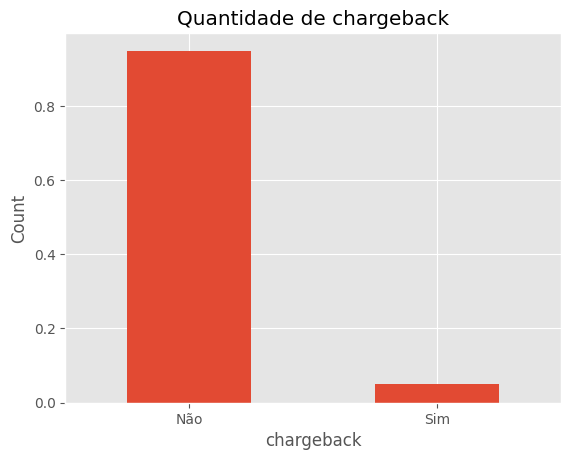

In [7]:
df['cbk'].value_counts(normalize=True).plot(kind="bar")
plt.title('Quantidade de chargeback')
plt.xlabel('chargeback')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

### Categorical features

In [8]:
import scipy.stats as ss
import itertools

In [9]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [10]:
def plot_categorical(col, title):
    
    graph_df = df[col].value_counts(normalize=True).rename('geral').to_frame()\
                .join(df_nocbk[col].value_counts(normalize=True).rename('sem cbk').to_frame()) \
                .join(df_cbk[col].value_counts(normalize=True).rename('com cbk').to_frame())

    graph_df.plot(kind='bar',figsize=(8, 4))

categorical_feature = ['periodo_mes', 'periodo_semana', 'dia_semana', 'periodo_dia', 'hora', 'cartao_usado_antes']

In [11]:
for cat in categorical_feature:

    print("Correlation between " + cat + " and CBK: " + str(cramers_v(df[cat], df["cbk"])))

Correlation between periodo_mes and CBK: 0.05247454732780261
Correlation between periodo_semana and CBK: 0.03451864039220128
Correlation between dia_semana and CBK: 0.04530421242847666
Correlation between periodo_dia and CBK: 0.062017641763517956
Correlation between hora and CBK: 0.1541242788571294
Correlation between cartao_usado_antes and CBK: 0.33490669125539557


In [12]:
categorical_feature_corr = categorical_feature + ['cbk']

Text(0.5, 1.0, 'Cramer V Correlation between Variables')

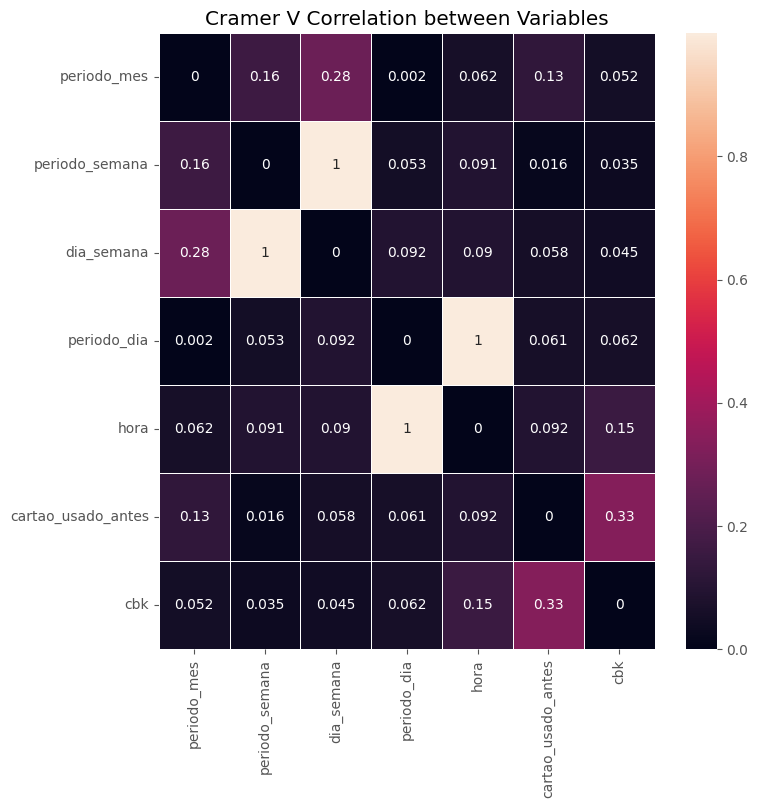

In [13]:
corrM = np.zeros((len(categorical_feature_corr),len(categorical_feature_corr)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(categorical_feature_corr, 2):
    idx1, idx2 = categorical_feature_corr.index(col1), categorical_feature_corr.index(col2)
    corrM[idx1, idx2] = cramers_v(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=categorical_feature_corr, columns=categorical_feature_corr)
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr, annot = True, linewidths=.5, ax=ax); ax.set_title("Cramer V Correlation between Variables")

#### Comportamento geral

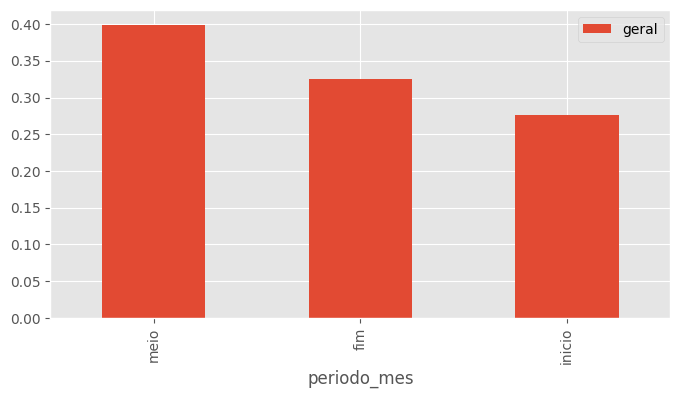

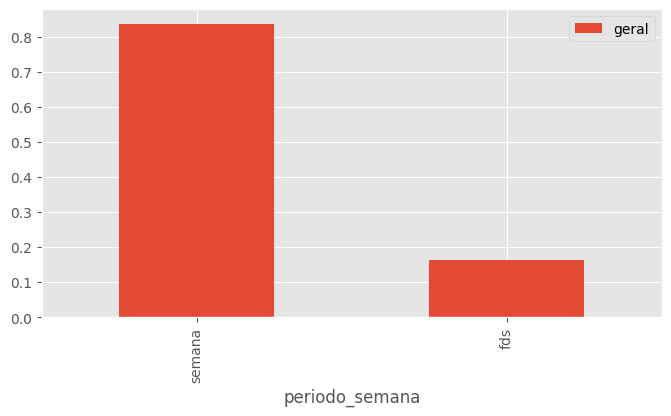

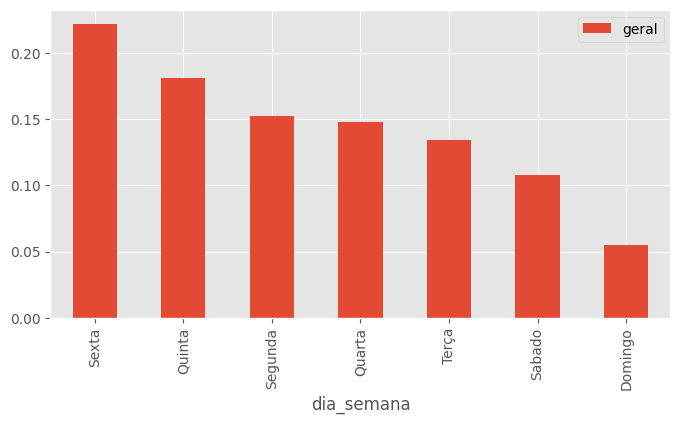

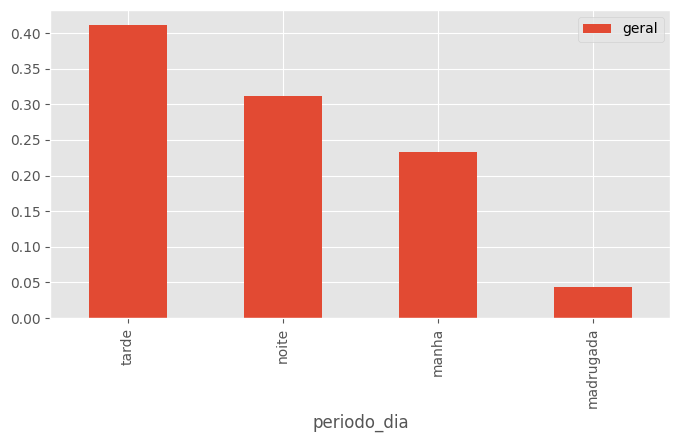

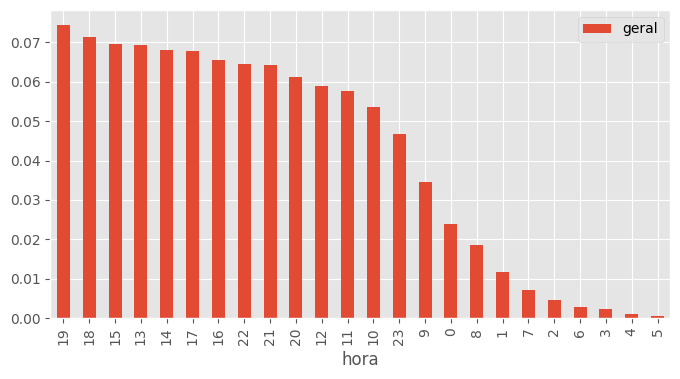

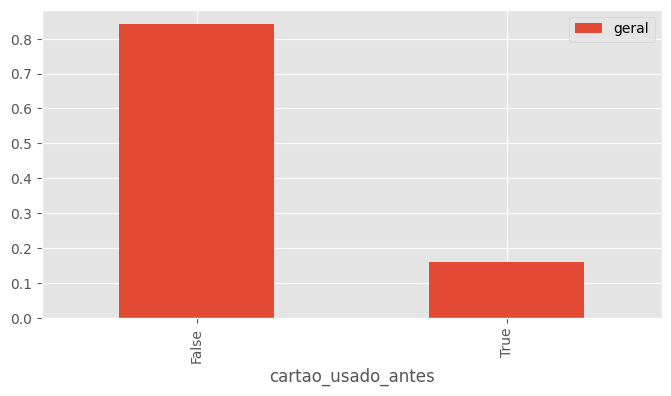

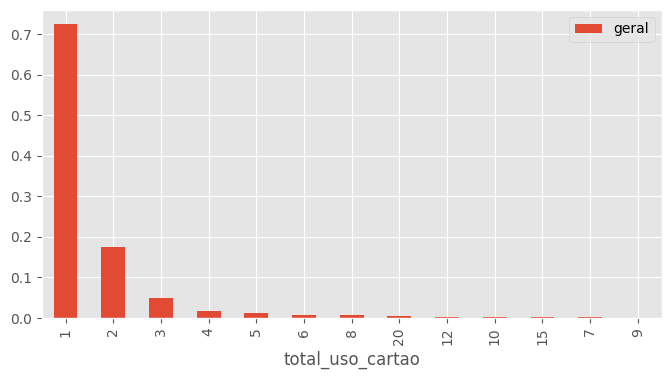

In [14]:
for col in categorical_feature + ['total_uso_cartao']:
    graph_df = df[col].value_counts(normalize=True).rename('geral').to_frame()
    graph_df.plot(kind='bar',figsize=(8, 4))

#### Comportamento chargeback x geral

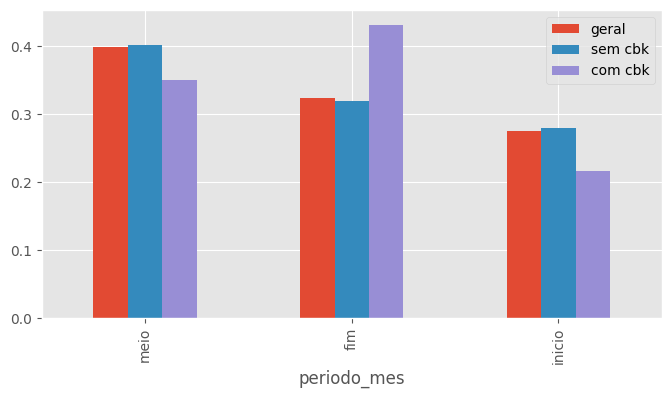

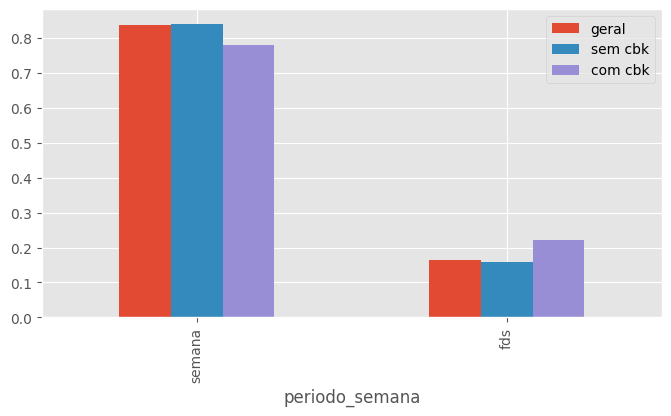

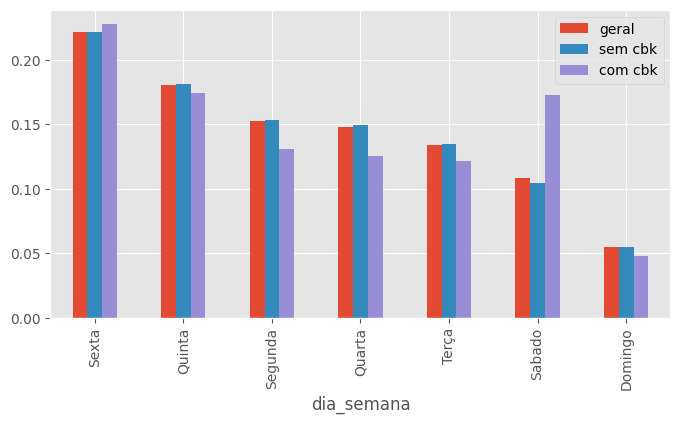

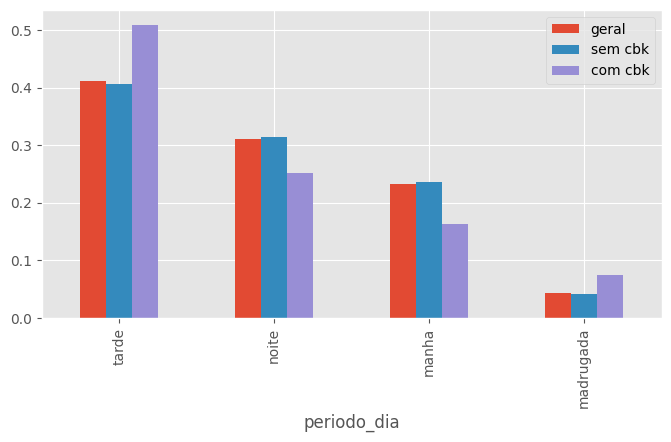

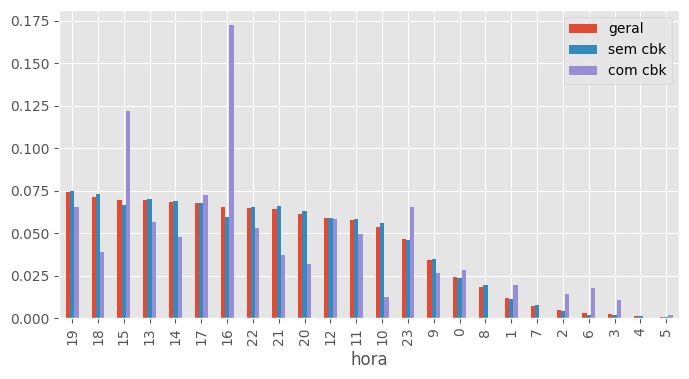

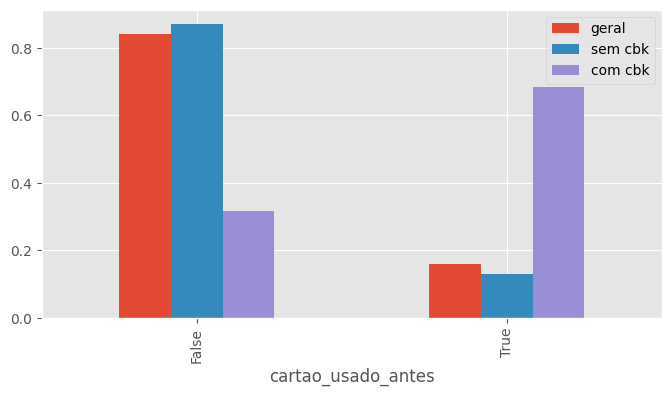

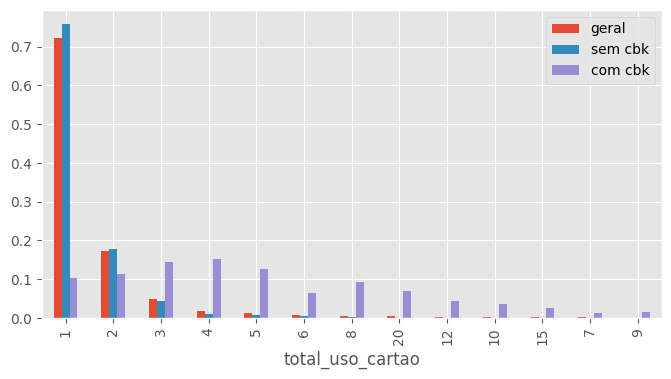

In [15]:
for cat in categorical_feature + ['total_uso_cartao']:
    plot_categorical(cat, 'Value counts of the ' + cat)

### Numerical features

In [16]:
numerical_features = ['valor', 'media_dia', 'media_cartao', 'total_uso_cartao', 'vez_uso_cartao']

<Axes: >

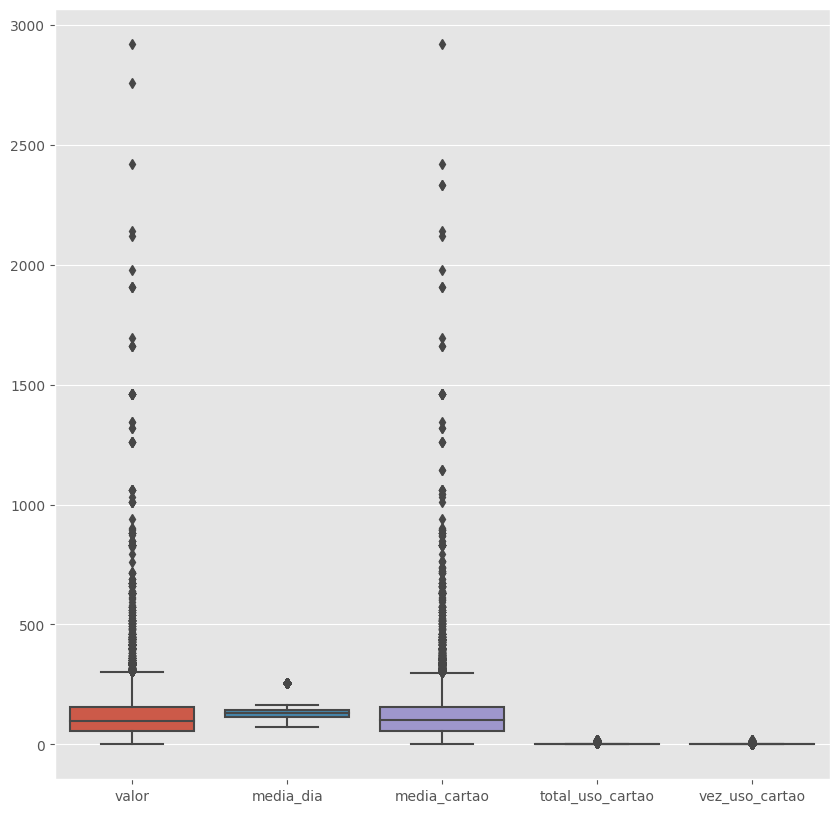

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df[numerical_features], ax=ax)

In [18]:
# Label encoding de uma variável categórica
le = LabelEncoder()
df_corr = df[numerical_features + ['cbk']].copy()
df_corr['cbk'] = le.fit_transform(df_corr['cbk'])


<Axes: title={'center': 'Pearson correlation between Variables'}>

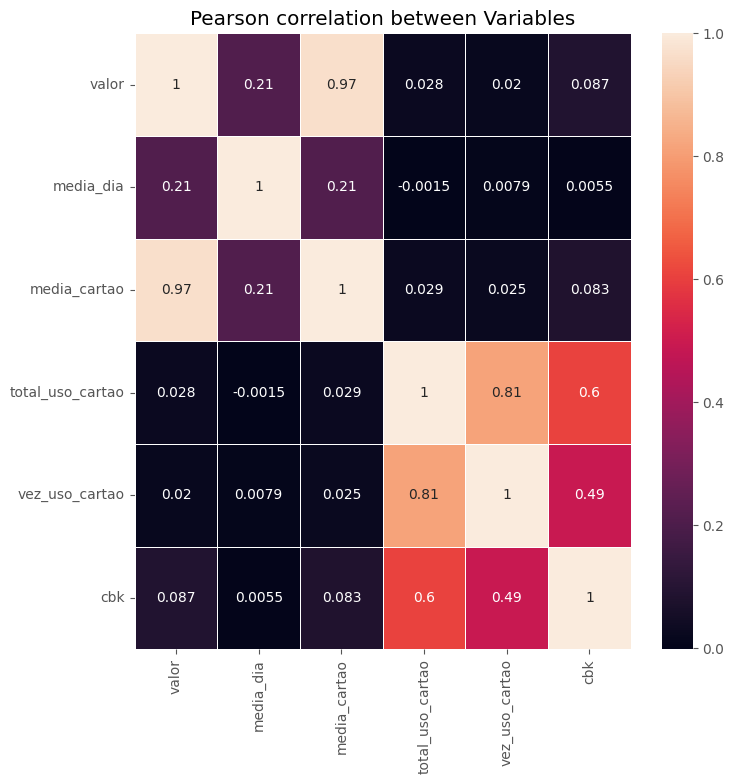

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Pearson correlation between Variables")
sns.heatmap(df_corr.corr(), annot = True, linewidths=.5, ax=ax)

In [20]:
df[numerical_features].describe()

,valor,media_dia,media_cartao,total_uso_cartao,vez_uso_cartao
count,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000
mean,129.999827,129.947435,129.996190,1.592512,1.289258
std,141.854838,30.103865,137.022385,1.711194,1.046857
min,1.000000,71.280000,1.000000,1.000000,1.000000
25%,55.000000,112.420000,57.260000,1.000000,1.000000
50%,99.000000,131.740000,100.800000,1.000000,1.000000
75%,154.000000,143.500000,154.000000,2.000000,1.000000
max,2920.000000,256.380000,2920.000000,20.000000,20.000000


In [21]:
df[numerical_features]

,valor,media_dia,media_cartao,total_uso_cartao,vez_uso_cartao
0,36.54,139.59,36.54,2,1
1,36.54,139.59,36.54,2,2
2,69.00,139.59,69.00,1,1
3,193.43,139.59,193.43,1,1
4,132.00,139.59,132.00,1,1
...,...,...,...,...,...
10999,15.00,92.96,15.00,2,1
11000,20.00,92.96,20.00,2,1
11001,70.00,92.96,70.00,2,1
11002,20.00,92.96,20.00,2,1


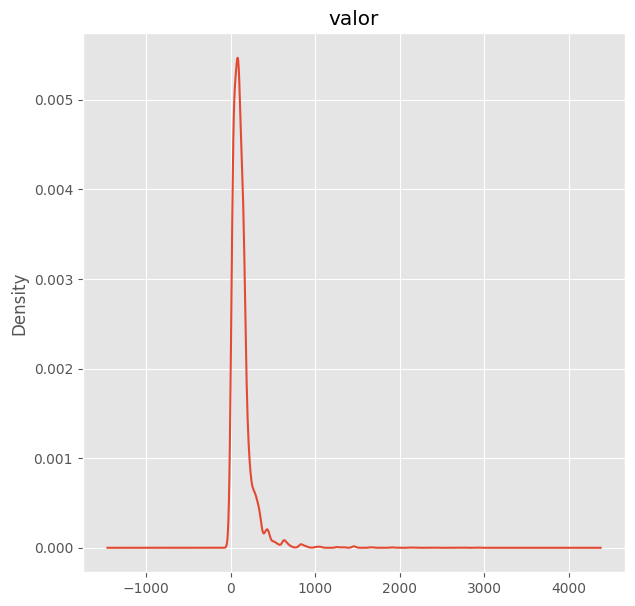

Assimetria: 5.981001920046743


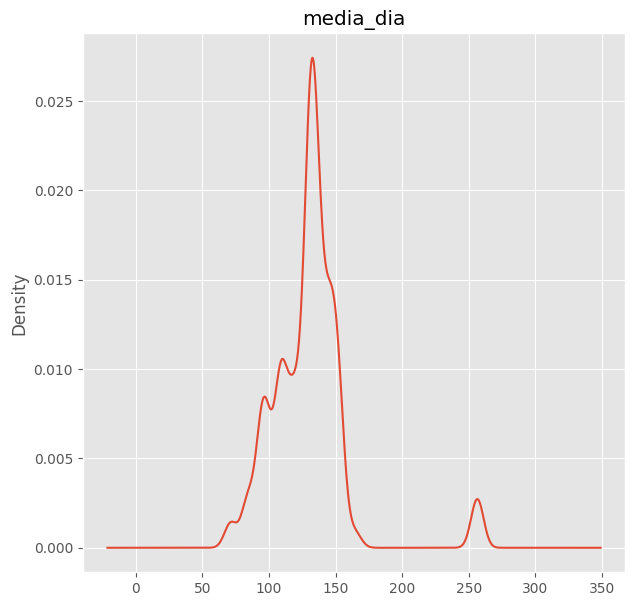

Assimetria: 2.0155362946368256


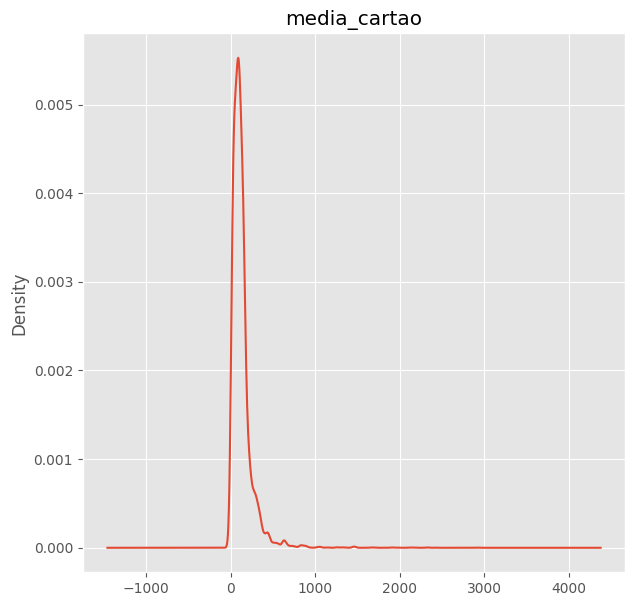

Assimetria: 6.037402857625141


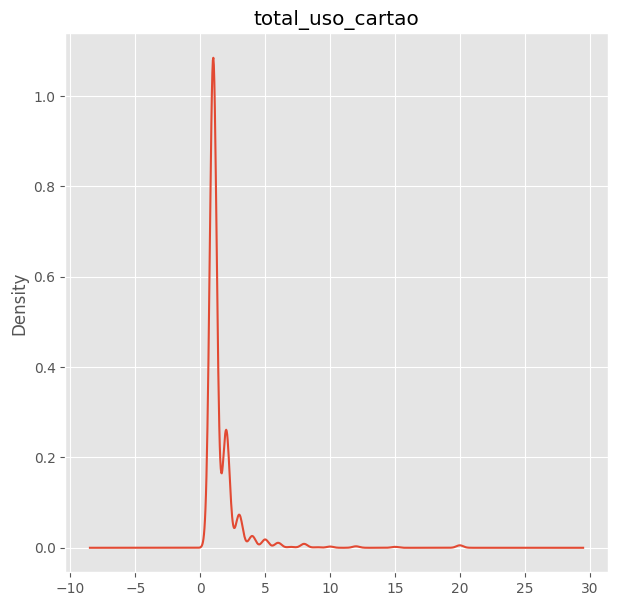

Assimetria: 6.570747027555289


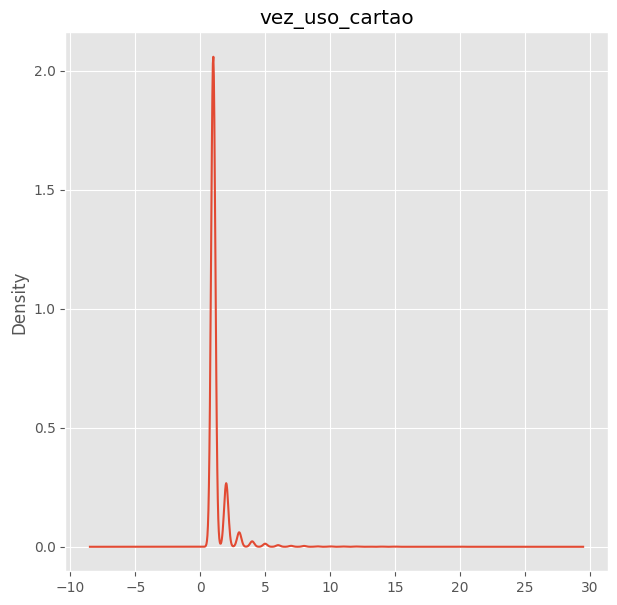

Assimetria: 8.194018584045601


In [22]:
for col in numerical_features:
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(col)
    df[col].plot(kind='kde')
    plt.show()
    print("Assimetria: " + str(df[col].skew()))

#### Perfil sem chargeback

In [23]:
df_nocbk[numerical_features].describe()

,valor,media_dia,media_cartao,total_uso_cartao,vez_uso_cartao
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,127.136077,129.908639,127.334746,1.351250,1.168535
std,139.888508,29.946823,136.285055,0.773155,0.506431
min,1.000000,71.280000,1.000000,1.000000,1.000000
25%,55.000000,112.420000,55.000000,1.000000,1.000000
50%,99.000000,131.740000,99.000000,1.000000,1.000000
75%,154.000000,143.500000,154.000000,1.000000,1.000000
max,2920.000000,256.380000,2920.000000,8.000000,8.000000


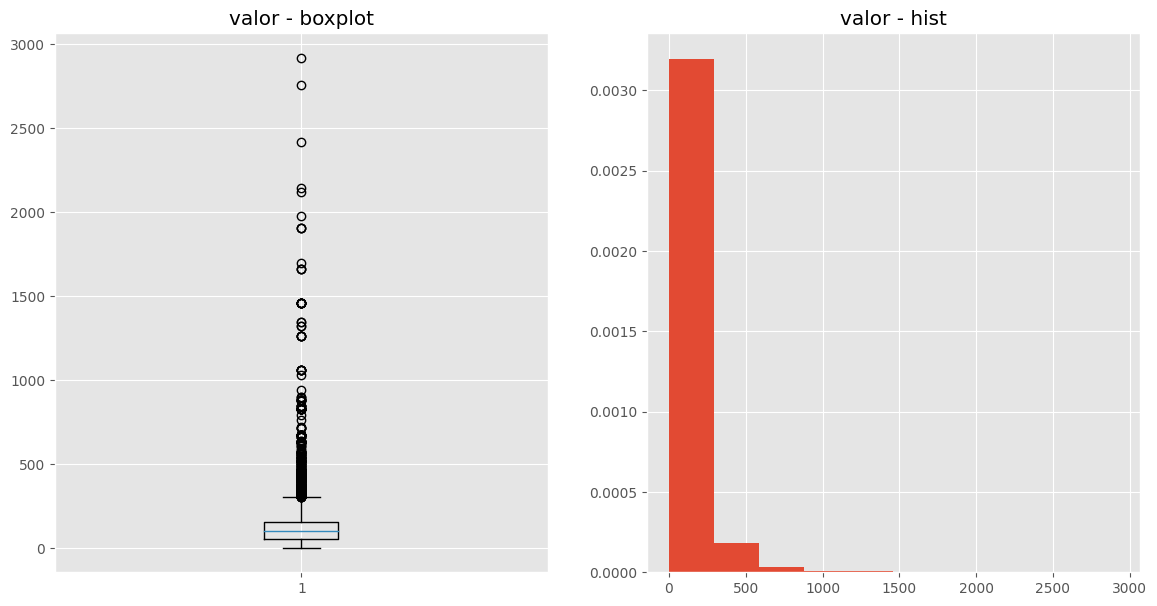

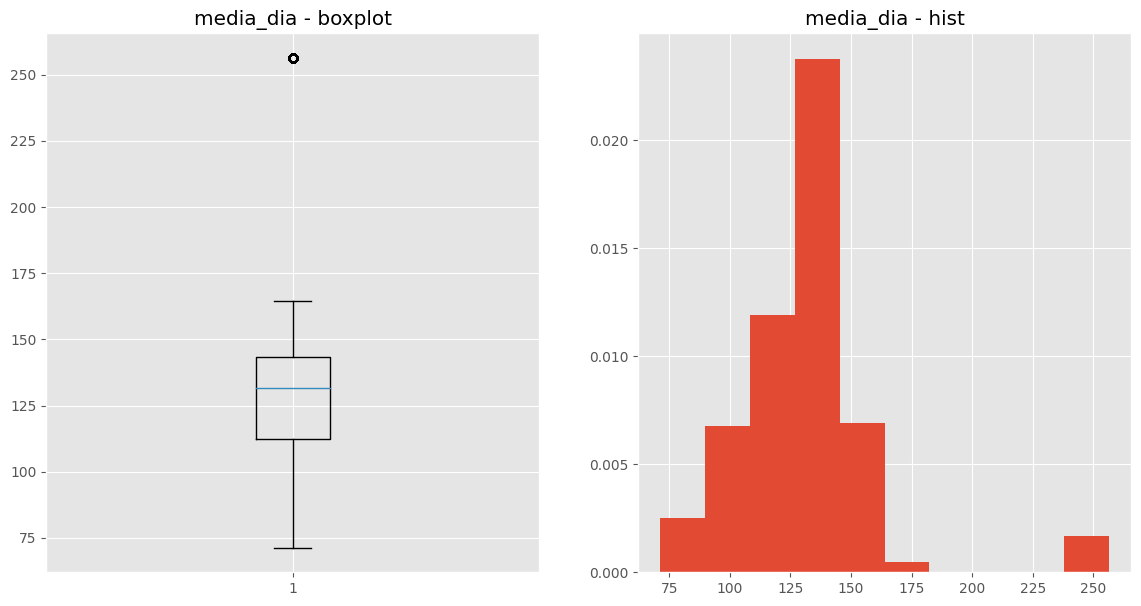

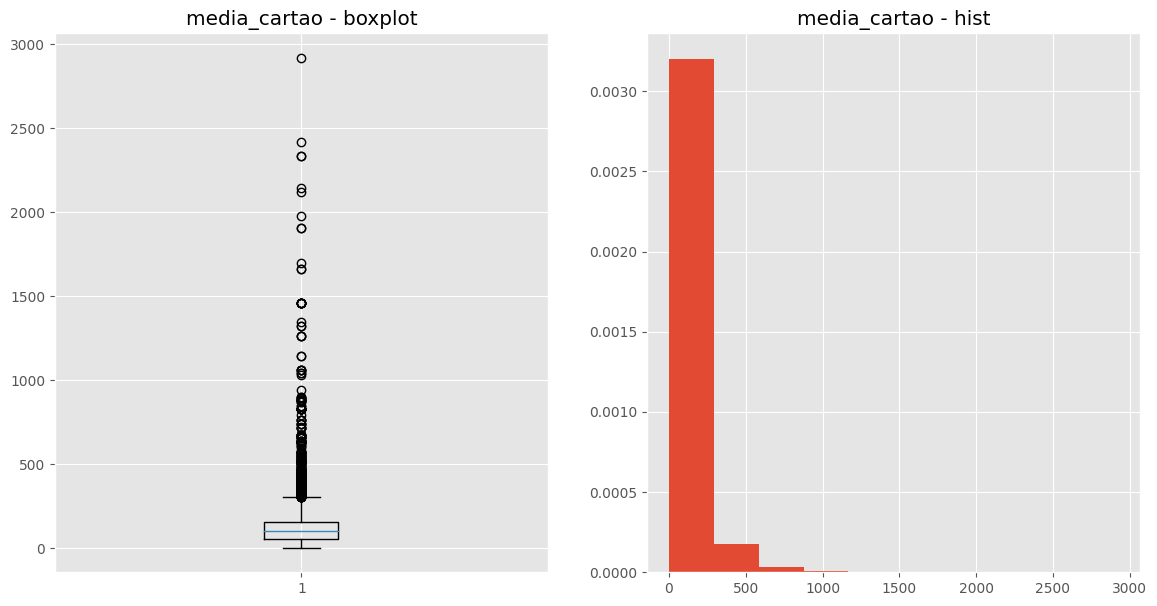

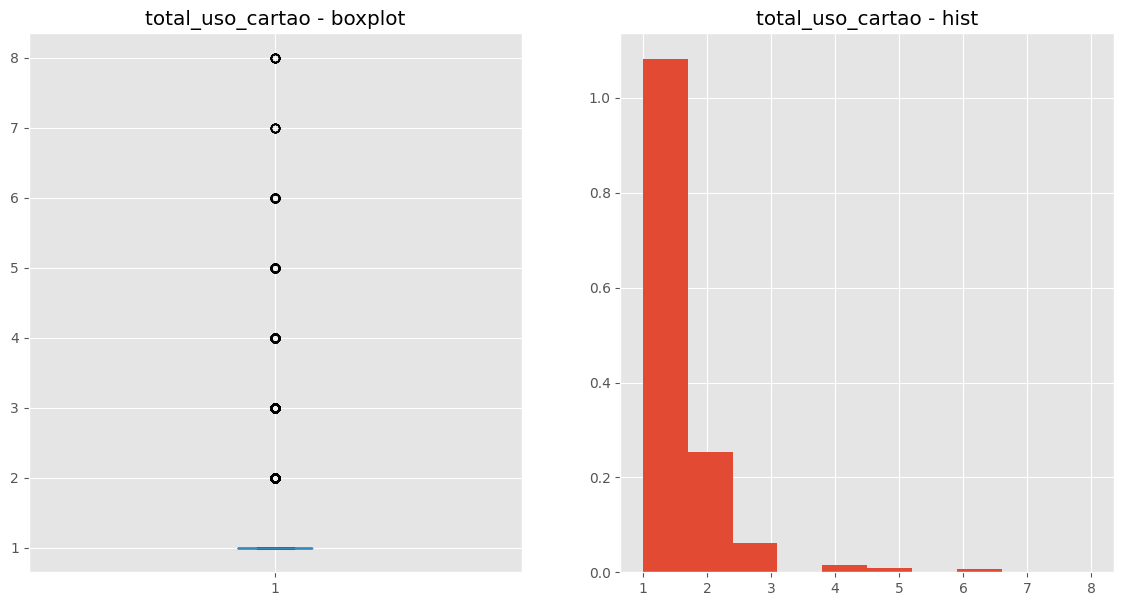

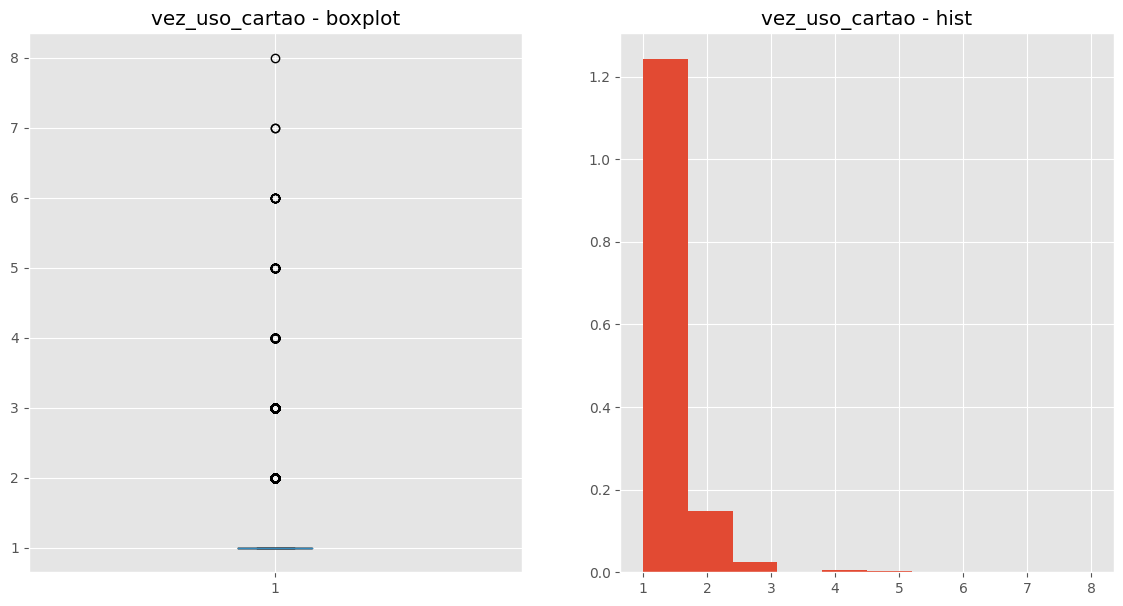

In [24]:
for col in numerical_features:
    fig, ax = plt.subplots(1,2,figsize=(14, 7))
    ax[0].set_title(col + ' - boxplot')
    ax[0].boxplot(df_nocbk[col].values)
    ax[1].set_title(col + ' - hist')
    ax[1].hist(df_nocbk[col].values, density=True, bins=10)
    plt.show()

#### Perfil com chargebck

In [25]:
df_cbk[numerical_features].describe()

,valor,media_dia,media_cartao,total_uso_cartao,vez_uso_cartao
count,567.000000,567.000000,567.000000,567.000000,567.000000
mean,182.714039,130.661570,178.986490,6.033510,3.511464
std,165.644727,32.881401,141.382517,5.007126,3.370438
min,13.990000,83.910000,17.240000,1.000000,1.000000
25%,67.500000,108.590000,95.200000,3.000000,1.000000
50%,132.000000,131.740000,127.000000,4.000000,2.000000
75%,209.000000,139.590000,250.000000,8.000000,4.000000
max,1012.000000,256.380000,1012.000000,20.000000,20.000000


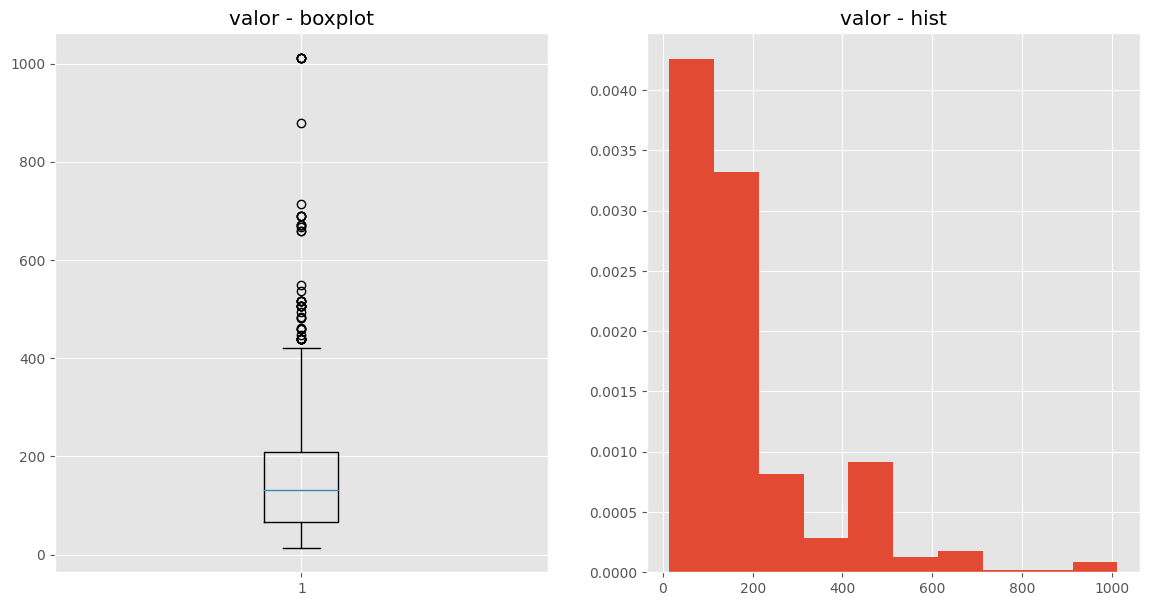

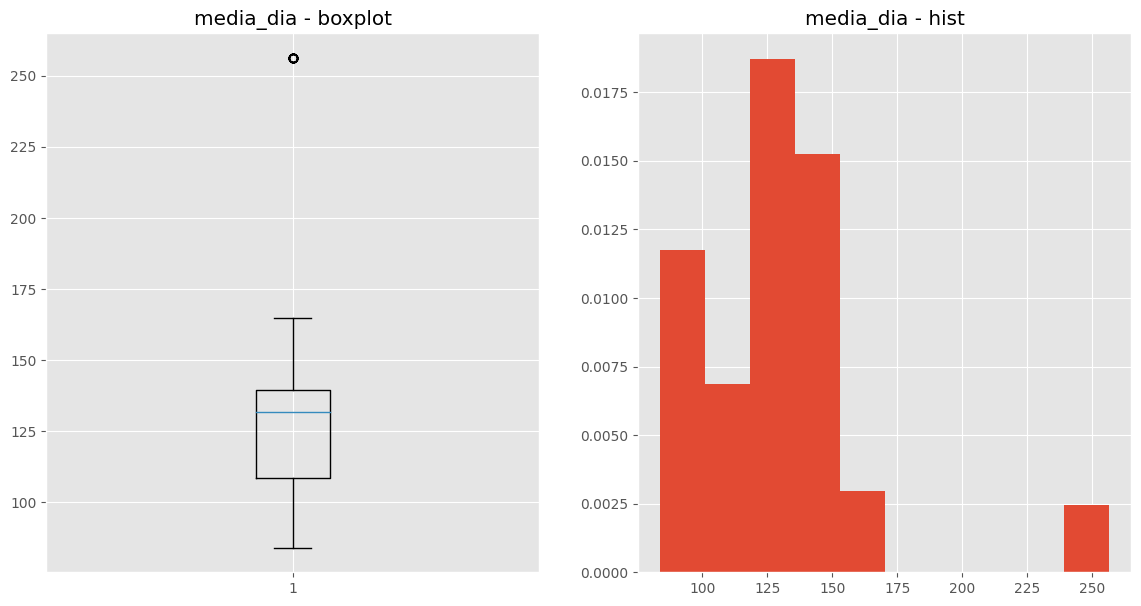

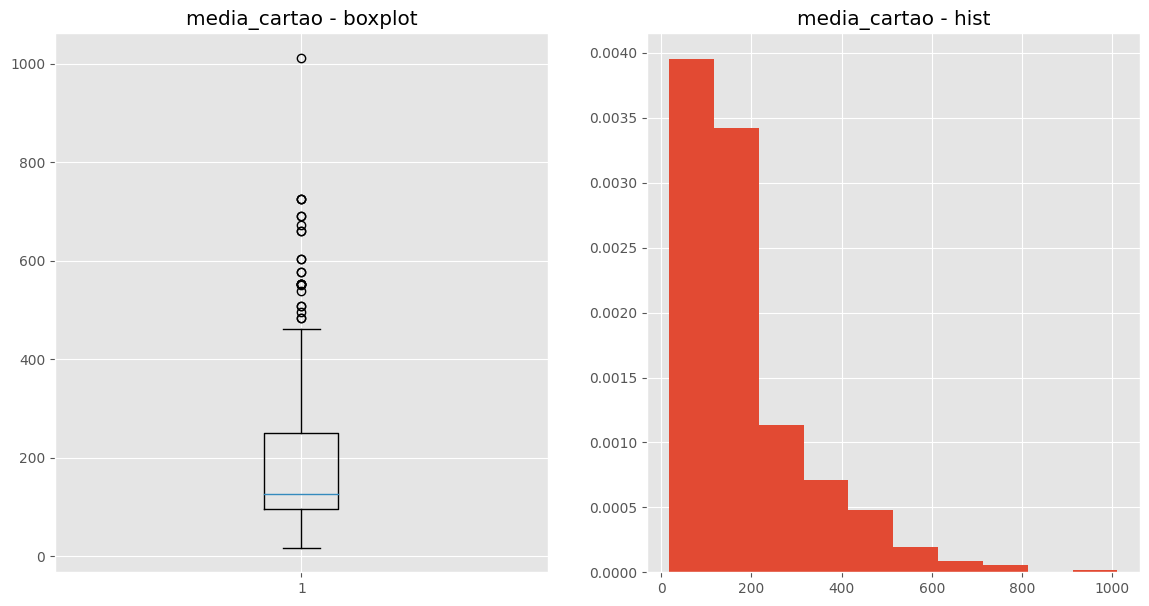

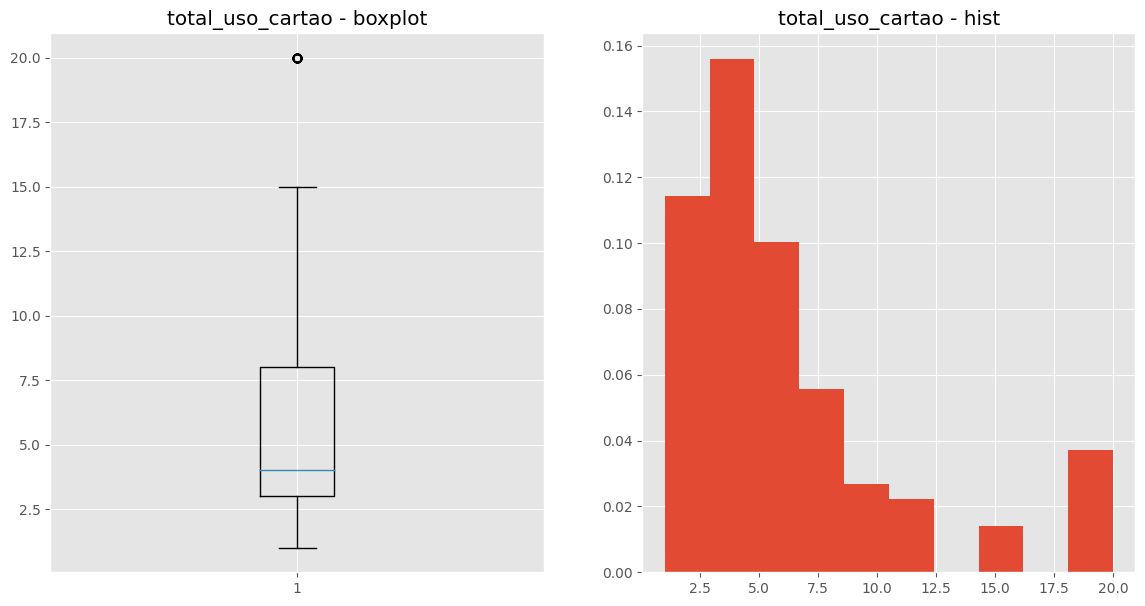

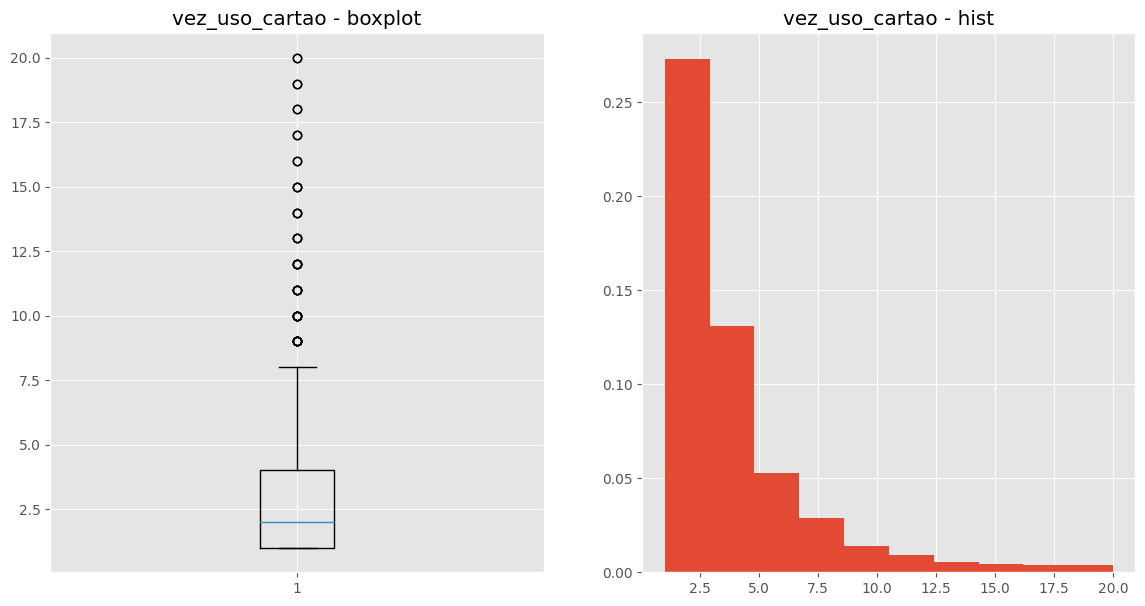

In [26]:
for col in numerical_features:
    fig, ax = plt.subplots(1,2,figsize=(14, 7))
    ax[0].set_title(col + ' - boxplot')
    ax[0].boxplot(df_cbk[col].values)
    ax[1].set_title(col + ' - hist')
    ax[1].hist(df_cbk[col].values, density=True, bins=10)
    plt.show()

In [27]:
df_cbk[df_cbk['valor'] > 126.6]

,dia,dia_semana,periodo_semana,periodo_mes,hora,hora_completa_segundos,periodo_dia,cartão,valor,media_dia,media_cartao,total_uso_cartao,cbk,vez_uso_cartao,cartao_usado_antes
146,1,Sexta,semana,inicio,20,72791,noite,535858******1168,207.00,139.59,207.00,1,Sim,1,False
156,1,Sexta,semana,inicio,21,77313,noite,544731******8742,690.00,139.59,690.00,1,Sim,1,False
157,1,Sexta,semana,inicio,21,77743,noite,544731******2235,690.00,139.59,690.00,1,Sim,1,False
175,2,Sabado,fds,inicio,3,12072,madrugada,498401******3608,185.39,164.68,185.39,1,Sim,1,False
198,2,Sabado,fds,inicio,13,49806,tarde,552236******9632,220.00,164.68,319.00,4,Sim,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10700,29,Sexta,semana,fim,22,79926,noite,554927******5988,165.00,108.59,165.00,1,Sim,1,False
10886,30,Sabado,fds,fim,14,52882,tarde,401370******9822,165.00,92.96,165.00,4,Sim,1,False
10887,30,Sabado,fds,fim,14,52960,tarde,401370******9822,165.00,92.96,165.00,4,Sim,2,True
10924,30,Sabado,fds,fim,17,61741,tarde,527496******9442,207.00,92.96,207.00,2,Sim,1,False


### Analisando cartões que sofreram cbk

In [28]:
df['cartão'].drop_duplicates().count()/len(df)

0.84151217739004

In [29]:
df_nocbk['cartão'].drop_duplicates().count()/len(df_nocbk)

0.8710357382389575

In [30]:
df_cbk['cartão'].drop_duplicates().count()/len(df_cbk)

0.3262786596119929

In [31]:
df_cbk['cartão'].drop_duplicates()

8        554906******0358
11       498406******6424
146      535858******1168
156      544731******8742
157      544731******2235
               ...       
10796    548724******6376
10834    541555******4363
10886    401370******9822
10924    527496******9442
10993    539614******3442
Name: cartão, Length: 185, dtype: object

cartão
0    169
1     16
Name: count, dtype: int64


<Axes: xlabel='cartão'>

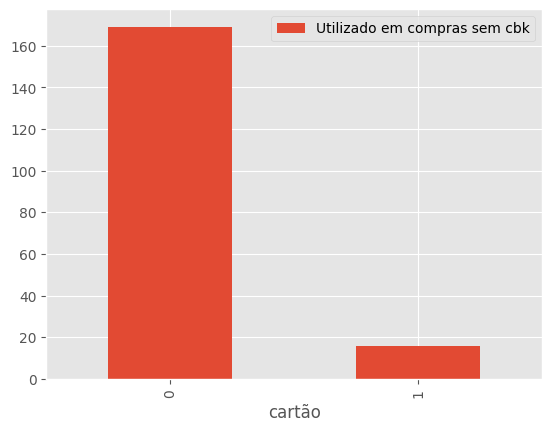

In [32]:
# Cartões unicos utilizados em compras
print(df_cbk['cartão'].drop_duplicates().isin(df_nocbk['cartão']).astype(int).value_counts())
df_cbk['cartão'].drop_duplicates().isin(df_nocbk['cartão']).astype(int).value_counts().rename('Utilizado em compras sem cbk').to_frame().plot(kind='bar' )

### Regras de negocios

#### Bloqueando transações depois de 3 transação usando o mesmo cartão no mês

In [33]:
df

,dia,dia_semana,periodo_semana,periodo_mes,hora,hora_completa_segundos,periodo_dia,cartão,valor,media_dia,media_cartao,total_uso_cartao,cbk,vez_uso_cartao,cartao_usado_antes
0,1,Sexta,semana,inicio,0,114,madrugada,536518******2108,36.54,139.59,36.54,2,Não,1,False
1,1,Sexta,semana,inicio,0,226,madrugada,536518******2108,36.54,139.59,36.54,2,Não,2,True
2,1,Sexta,semana,inicio,0,530,madrugada,453211******1239,69.00,139.59,69.00,1,Não,1,False
3,1,Sexta,semana,inicio,0,1620,madrugada,548827******1705,193.43,139.59,193.43,1,Não,1,False
4,1,Sexta,semana,inicio,1,5566,madrugada,531681******9778,132.00,139.59,132.00,1,Não,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,30,Sabado,fds,fim,23,83327,noite,439354******5281,15.00,92.96,15.00,2,Não,1,False
11000,30,Sabado,fds,fim,23,83724,noite,549167******1648,20.00,92.96,20.00,2,Não,1,False
11001,30,Sabado,fds,fim,23,83861,noite,518759******8384,70.00,92.96,70.00,2,Não,1,False
11002,30,Sabado,fds,fim,23,85891,noite,518759******0329,20.00,92.96,20.00,2,Não,1,False


In [34]:
df[df['cartão'] == '498406******6424'].sort_values('hora_completa_segundos')

,dia,dia_semana,periodo_semana,periodo_mes,hora,hora_completa_segundos,periodo_dia,cartão,valor,media_dia,media_cartao,total_uso_cartao,cbk,vez_uso_cartao,cartao_usado_antes
11,1,Sexta,semana,inicio,9,33695,manha,498406******6424,126.5,139.59,126.5,8,Sim,1,False
12,1,Sexta,semana,inicio,9,33782,manha,498406******6424,126.5,139.59,126.5,8,Sim,2,True
13,1,Sexta,semana,inicio,9,33864,manha,498406******6424,126.5,139.59,126.5,8,Sim,3,True
14,1,Sexta,semana,inicio,9,33947,manha,498406******6424,126.5,139.59,126.5,8,Sim,4,True
15,1,Sexta,semana,inicio,9,34016,manha,498406******6424,126.5,139.59,126.5,8,Sim,5,True
16,1,Sexta,semana,inicio,9,34107,manha,498406******6424,126.5,139.59,126.5,8,Sim,6,True
17,1,Sexta,semana,inicio,9,34179,manha,498406******6424,126.5,139.59,126.5,8,Sim,7,True
18,1,Sexta,semana,inicio,9,34252,manha,498406******6424,126.5,139.59,126.5,8,Sim,8,True


In [35]:
print(df['cbk'].value_counts())
print(df['cbk'].value_counts() / len(df))

cbk
Não    10437
Sim      567
Name: count, dtype: int64
cbk
Não    0.948473
Sim    0.051527
Name: count, dtype: float64


In [36]:
df_filtered = df[df['vez_uso_cartao'] < 4]

In [37]:
df_filtered

,dia,dia_semana,periodo_semana,periodo_mes,hora,hora_completa_segundos,periodo_dia,cartão,valor,media_dia,media_cartao,total_uso_cartao,cbk,vez_uso_cartao,cartao_usado_antes
0,1,Sexta,semana,inicio,0,114,madrugada,536518******2108,36.54,139.59,36.54,2,Não,1,False
1,1,Sexta,semana,inicio,0,226,madrugada,536518******2108,36.54,139.59,36.54,2,Não,2,True
2,1,Sexta,semana,inicio,0,530,madrugada,453211******1239,69.00,139.59,69.00,1,Não,1,False
3,1,Sexta,semana,inicio,0,1620,madrugada,548827******1705,193.43,139.59,193.43,1,Não,1,False
4,1,Sexta,semana,inicio,1,5566,madrugada,531681******9778,132.00,139.59,132.00,1,Não,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,30,Sabado,fds,fim,23,83327,noite,439354******5281,15.00,92.96,15.00,2,Não,1,False
11000,30,Sabado,fds,fim,23,83724,noite,549167******1648,20.00,92.96,20.00,2,Não,1,False
11001,30,Sabado,fds,fim,23,83861,noite,518759******8384,70.00,92.96,70.00,2,Não,1,False
11002,30,Sabado,fds,fim,23,85891,noite,518759******0329,20.00,92.96,20.00,2,Não,1,False


In [38]:
df[(df['vez_uso_cartao'] > 3)]

,dia,dia_semana,periodo_semana,periodo_mes,hora,hora_completa_segundos,periodo_dia,cartão,valor,media_dia,media_cartao,total_uso_cartao,cbk,vez_uso_cartao,cartao_usado_antes
14,1,Sexta,semana,inicio,9,33947,manha,498406******6424,126.5,139.59,126.50,8,Sim,4,True
15,1,Sexta,semana,inicio,9,34016,manha,498406******6424,126.5,139.59,126.50,8,Sim,5,True
16,1,Sexta,semana,inicio,9,34107,manha,498406******6424,126.5,139.59,126.50,8,Sim,6,True
17,1,Sexta,semana,inicio,9,34179,manha,498406******6424,126.5,139.59,126.50,8,Sim,7,True
18,1,Sexta,semana,inicio,9,34252,manha,498406******6424,126.5,139.59,126.50,8,Sim,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,30,Sabado,fds,fim,13,46940,tarde,521397******2711,110.0,92.96,122.66,20,Sim,18,True
10843,30,Sabado,fds,fim,13,46999,tarde,521397******2711,110.0,92.96,122.66,20,Sim,19,True
10845,30,Sabado,fds,fim,13,47046,tarde,521397******2711,110.0,92.96,122.66,20,Sim,20,True
10858,30,Sabado,fds,fim,13,48067,tarde,455181******0805,88.0,92.96,51.20,5,Não,5,True


In [39]:
df[(df['vez_uso_cartao'] > 3)]['cbk'].value_counts()

cbk
Sim    189
Não     81
Name: count, dtype: int64

In [40]:
print(df_filtered['cbk'].value_counts())
print(df_filtered['cbk'].value_counts(normalize=True))

cbk
Não    10356
Sim      378
Name: count, dtype: int64
cbk
Não    0.964785
Sim    0.035215
Name: proportion, dtype: float64


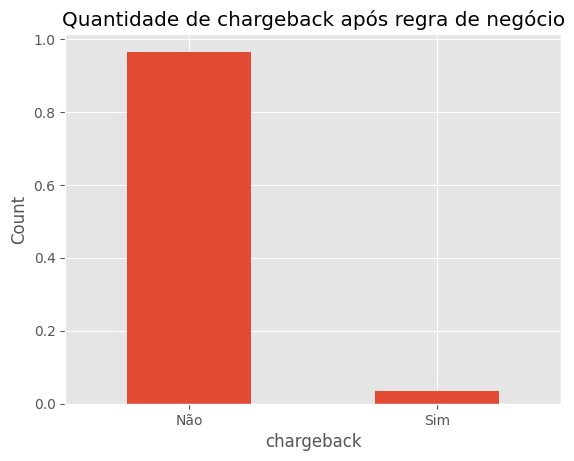

In [41]:
df_filtered['cbk'].value_counts(normalize=True).plot(kind="bar")
plt.title('Quantidade de chargeback após regra de negócio')
plt.xlabel('chargeback')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [42]:
#total com chargeback filtrando
df[(df['vez_uso_cartao'] > 3) & (df['cbk'] == 'Sim')]['valor'].sum()

30379.05

In [43]:
#total sem chargeback filtrando
df[(df['vez_uso_cartao'] > 3) & (df['cbk'] == 'Não')]['valor'].sum()

7907.719999999999

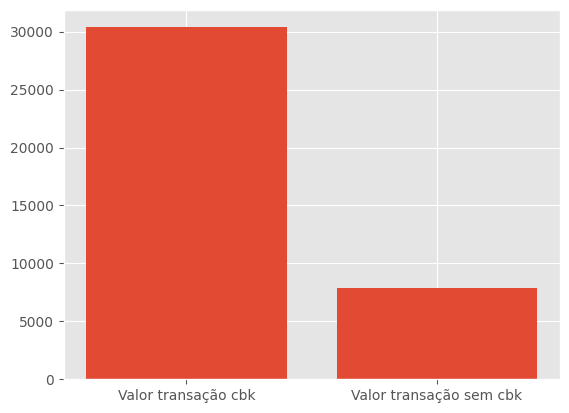

In [44]:
valor = [df[(df['vez_uso_cartao'] > 3) & (df['cbk'] == 'Sim')]['valor'].sum(), df[(df['vez_uso_cartao'] > 3) & (df['cbk'] == 'Não')]['valor'].sum()]
label = ['Valor transação cbk', 'Valor transação sem cbk']
# Figure Size
 
# Horizontal Bar Plot
plt.bar(label, valor)
 
# Show Plot
plt.show()

In [45]:
len(df_filtered)

10734

In [46]:
# Valor não bloqueado com a regra
df_filtered[df_filtered['cbk'] == 'Sim']['valor'].sum()

73219.81

In [47]:
df_filtered[df_filtered['cbk'] == 'Sim']['valor'].count()

378

In [48]:
df_filtered[df_filtered['cbk'] == 'Não']['valor'].sum()

1319011.52

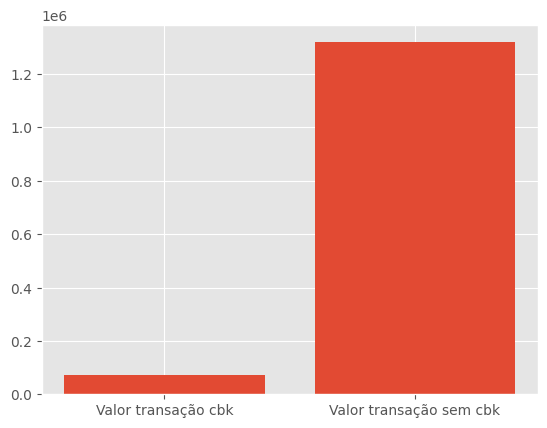

In [49]:
valor = [df_filtered[df_filtered['cbk'] == 'Sim']['valor'].sum(), df_filtered[df_filtered['cbk'] == 'Não']['valor'].sum()]
label = ['Valor transação cbk', 'Valor transação sem cbk']
# Figure Size
 
# Horizontal Bar Plot
plt.bar(label, valor)
 
# Show Plot
plt.show()